In [36]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas as pd 
import numpy, textblob, string, random
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

from sklearn.externals import joblib
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.ticker as mtick

In [11]:
def predict_categories():
    path = 'G:/My Drive/NCSU/Hackathons/HackNC2019/MyPueblo/backend/'
    original_df = pd.read_csv(path + 'data/categorize_transactions/train_data.csv')
    bank_df = pd.read_csv(path+'data/sample_user/bankstatement.csv')
    
    text= original_df['Description']
    encoder = preprocessing.LabelEncoder()
    final_y =  encoder.fit_transform(original_df['Category'])
    
    # create a count vectorizer object 
    count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
    count_vect.fit(original_df['Description'])
    final_count = count_vect.transform(bank_df['Description'])
    filename = path + 'model/finalized_model.sav'

    final_NB_model = joblib.load(filename)
    NB_final_model_predictions = final_NB_model.predict(final_count)
    category_predictions = encoder.inverse_transform(NB_final_model_predictions)
    
    # cost = bank_df['Cost']
    bank_df['pred_categories']=category_predictions
    return bank_df

In [12]:
predicted_df = predict_categories()
print(predicted_df.head())

                       Description  Cost pred_categories
0                  Urban Solutions  1921    pest control
1  Sumitomo Mitsui Financial Group   546            rent
2     Talquin Electric Cooperative   405       utilities
3             Big Crew Maintenance   686     home repair
4                           Cavasa  1403    pest control


In [21]:
# filtered = predicted_df.loc[predicted_df['pred_categories'] == 'rent']
# total_cost = sum(filtered['Cost'].values.tolist())
# print(total_cost)

25902


In [33]:
def generate_total_df(df):
    '''
    Input is predicted df with pred_categories.
    '''
    cat_cost = []
    categories = set(df['pred_categories'])
    for i in categories:
        filtered = df.loc[df['pred_categories'] == i]
        total_cost = sum(filtered['Cost'].values.tolist())
        cat_cost.append([i,total_cost])
    new_df = pd.DataFrame(cat_cost, columns = ['category', 'total_cost'])
    new_df = new_df.set_index('category')
#     new_df = new_df.set_index(new_df.iloc[0].values)
    return new_df

total_df = generate_total_df(predicted_df)
print(total_df)

              total_cost
category                
utilities          28445
pest control       34040
rent               25902
home repair        24832


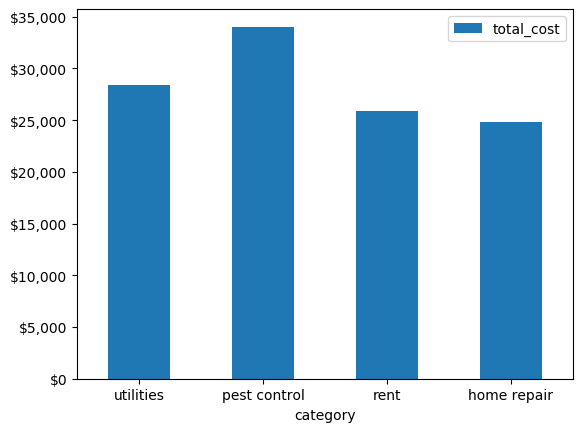

In [50]:
ax = total_df.plot.bar(rot=0)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

plt.savefig('total_cost.png', dpi=1200)
plt.show()